# Práctica del módulo de Machine Learning

## Análisis exploratorio

In [1]:
# Se cargan las librerías necesarias para el análisi exploratorio

import numpy  as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


#### Nota: ver todas las columnas

Se tienen muchas columnas y pandas no las muestra todas. Se puede modificar esa opción usando la siguiente línea:

    pandas.set_option('display.max_columns', None)

None, significa que no hay límite para el número de columnas a mostrarse. Para regresar a la opción por default se usa el siguiente comando:

    pandas.reset_option('display.max_columns')
    
Esto puede aplicarse también al número de columnas usando el argumento: 'display.max_rows'

In [3]:
pd.set_option('display.max_columns', None) # para ver todas las columnas
df.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

#### ¿Qué columnas se tienen en el dataset?

In [4]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Una primera decisión es que no tomaré en cuenta las variables que contienen enlaces. Estas son todas las que tienen
Url en el nombre, porque no puedo obtener información relevante sin usar los enlaces:
    
      ['Listing Url', 'Thumbnail Url', 'Medium Url',
       'Picture Url', 'XL Picture Url', 'Host URL',
       'Host Thumbnail Url', 'Host Picture Url']

In [5]:
# quitamos las columnas de Url

columnas_url = ['Listing Url', 'Thumbnail Url', 'Medium Url',
   'Picture Url', 'XL Picture Url', 'Host URL',
   'Host Thumbnail Url', 'Host Picture Url']

df = df.drop(columnas_url, axis=1)

In [6]:
pd.set_option('display.max_rows', None)
df.dtypes

ID                                  int64
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Host ID                             int64
Host Name                          object
Host Since                         object
Host Location                      object
Host About                         object
Host Response Time                 object
Host Response Rate                float64
Host Acceptance Rate               object
Host Neighbourhood                 object
Host Listings Count               

También se quitarán las columnas de ID,las de información del host, las relacionadas a datos de scrapping, fechas de reviews y precio por periodos.

In [7]:
columnas_2 = ['ID', 'Scrape ID', 'Last Scraped',
             'Weekly Price','Monthly Price', 'Minimum Nights',
             'Maximum Nights', 'Calendar Updated', 'Calendar last Scraped',
             'Host ID', 'Host Name', 'Host Since',
             'Host Location', 'Host About', 'Host Response Time',
             'Host Response Rate', 'Host Acceptance Rate', 'Host Neighbourhood',
             'Host Listings Count', 'Host Total Listings Count',
             'Host Verifications', 'First Review', 'Last Review']

df = df.drop(columnas_2, axis=1)

También se eliminarán las columnas que requerirían de un tratamiento de NLP.

                ['Name', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit',
                'Access', 'Interaction', 'House Rules']

In [8]:
Text_columns = ['Name', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit',
                'Access', 'Interaction', 'House Rules', 'Amenities']

df = df.drop(Text_columns, axis=1)

In [9]:
df.columns

Index(['Experiences Offered', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'License',
       'Jurisdiction Names', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation',
       'Features'],
      dtype='object')

In [10]:
df.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,none,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,60.0,NaN,25.0,1,0,NaN,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,none,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,NaN,15.0,1,0,NaN,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,none,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,NaN,10.0,NaN,5.0,1,0,NaN,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,none,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,NaN,30.0,NaN,NaN,1,0,NaN,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,none,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,32.0,NaN,NaN,1,10,NaN,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


¿Cuántos valores únicos hay por columna?

In [11]:
df.apply(lambda x: len(x.unique()))

Experiences Offered                   5
Street                             1438
Neighbourhood                       352
Neighbourhood Cleansed              444
Neighbourhood Group Cleansed         48
City                                223
State                                94
Zipcode                             536
Market                               43
Smart Location                      232
Country Code                         18
Country                              18
Latitude                          11824
Longitude                         11824
Property Type                        21
Room Type                             3
Accommodates                         16
Bathrooms                            18
Bedrooms                             11
Beds                                 17
Bed Type                              5
Square Feet                          90
Price                               346
Security Deposit                    116
Cleaning Fee                        105


Quiero ver de cerca las columnas no numéricas

In [12]:
df_object = df.select_dtypes(include=object)

In [13]:
df_object.columns

Index(['Experiences Offered', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Has Availability',
       'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation',
       'Features'],
      dtype='object')

In [14]:
df_object.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Street                           1438
Neighbourhood                     352
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       48
City                              223
State                              94
Zipcode                           536
Market                             43
Smart Location                    232
Country Code                       18
Country                            18
Property Type                      21
Room Type                           3
Bed Type                            5
Has Availability                    2
License                           253
Jurisdiction Names                 12
Cancellation Policy                 8
Geolocation                     11824
Features                           87
dtype: int64

In [15]:
df_object.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Has Availability,License,Jurisdiction Names,Cancellation Policy,Geolocation,Features
0,none,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,NaN,NaN,NaN,moderate,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,none,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,NaN,NaN,NaN,flexible,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,none,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,Apartment,Shared room,Real Bed,NaN,NaN,NaN,moderate,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,none,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,NaN,NaN,NaN,strict,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,none,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,Apartment,Private room,Real Bed,NaN,NaN,NaN,strict,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


Parece haber muchos none en Experiences Offered

In [16]:
df['Experiences Offered'].value_counts(normalize=True)

none        0.998816
business    0.000507
family      0.000254
social      0.000254
romantic    0.000169
Name: Experiences Offered, dtype: float64

Está casi en su totalidad vacía, así que se quitará.

La columna Street parece requerir mucho trabajo para extraer las calles adecuadamente. Se dejará de lado también.

Parece que las columnas de Neighbourhood tienen información similar o redundante. Tomaré la que tenga menos valores faltantes.

                            Neighbourhood
                            Neighbourhood Cleansed
                            Neighbourhood Group Cleansed

In [17]:
len(df_object[['Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed']]) - df_object[['Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed']].count()

Neighbourhood                   4159
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     818
dtype: int64

Entonces Neighbourhood y Neighbourhood Group Cleansed también serán retirados

La mayoría de los datos son de Madrid, por lo que se tomarán solo los pisos en el dataset de esta ciudad, y se dejarán de lado
las columnas redundantes:
     
        ['State', 'Zipcode', 'Market', 'Smart Location',
        'Country Code', 'Country']

Features no se ve como una columna útil, está tomando nota de otras características. Geolocation es longitud y latitud juntas.
Por lo tanto ambas también se quitarán:
    
        ['Geolocation', 'Features']

Del resto de columnas 'Has Availability', 'License', 'Jurisdiction Names' tienen demasiados valores faltantes y seran retiradas.

In [18]:
df_object_1 = df_object[['Has Availability', 'License', 'Jurisdiction Names', 'Cancellation Policy']]

len(df_object_1) - df_object_1.count()

Has Availability       11815
License                11547
Jurisdiction Names     11650
Cancellation Policy        0
dtype: int64

Se aplican los cambios al dataset original

In [19]:
df = df[df.City == 'Madrid']

columnas_3 = ['City', 'Experiences Offered', 'Street', 'Neighbourhood',
              'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market', 'Smart Location',
              'Country Code', 'Country', 'Geolocation', 'Features', 'Has Availability', 'License', 'Jurisdiction Names']

df = df.drop(columnas_3, axis=1)

In [20]:
df.head()

,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,Jerónimos,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,60.0,NaN,25.0,1,0,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,2.0,0.50
1,Sol,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,NaN,15.0,1,0,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,2.43
2,Vista Alegre,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,NaN,10.0,NaN,5.0,1,0,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN
3,Embajadores,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,NaN,30.0,NaN,NaN,1,0,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN
4,Gaztambide,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,32.0,NaN,NaN,1,10,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.0,2.08


Quiero ver valores faltantes en las columnas que no he revisado

In [21]:
(len(df) - df.count())/len(df)*100

Neighbourhood Cleansed             0.000000
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.000000
Room Type                          0.000000
Accommodates                       0.000000
Bathrooms                          0.378537
Bedrooms                           0.170342
Beds                               0.350147
Bed Type                           0.000000
Square Feet                       96.091606
Price                              0.075707
Security Deposit                  56.950885
Cleaning Fee                      40.550771
Guests Included                    0.000000
Extra People                       0.000000
Availability 30                    0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Availability 365                   0.000000
Number of Reviews                  0.000000
Review Scores Rating              21.633387
Review Scores Accuracy          

Square Feet, Security Deposit y Cleaning Fee, tienen demasiados

In [22]:
columnas_valores_faltantes = ['Square Feet', 'Security Deposit', 'Cleaning Fee']

df = df.drop(columnas_valores_faltantes, axis=1)

In [23]:
df.head()

,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,Jerónimos,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,60.0,1,0,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,2.0,0.50
1,Sol,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,1,0,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,2.43
2,Vista Alegre,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,10.0,1,0,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN
3,Embajadores,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,30.0,1,0,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN
4,Gaztambide,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,32.0,1,10,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.0,2.08


### Columnas con alta correlación entre sí

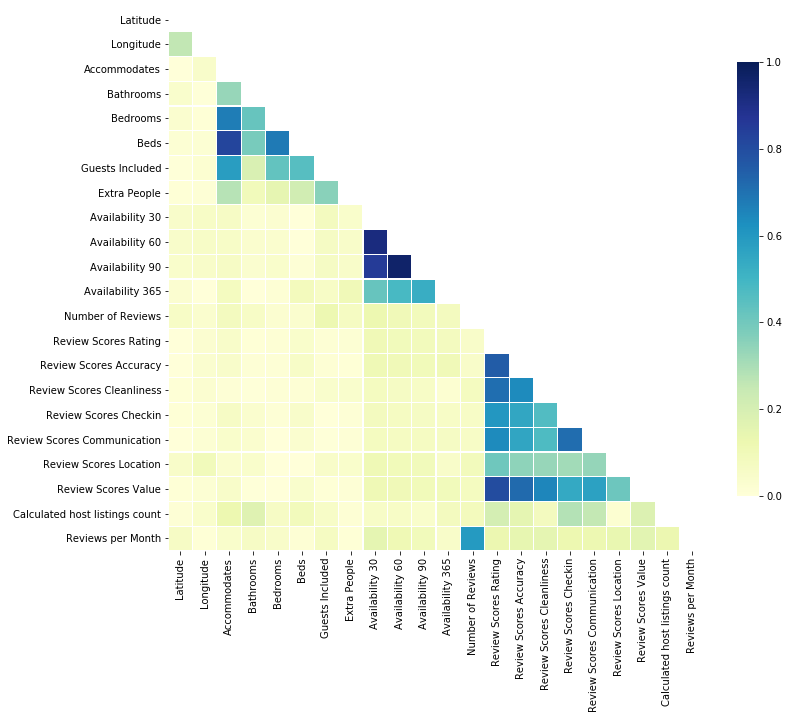

In [24]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [25]:
df.corr() # matriz de correlación

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Latitude,1.000000,0.258199,0.003237,0.039200,0.032560,0.021446,0.069960,-0.007418,0.009936,0.048320,0.048602,0.043223,0.027986,-0.059114,-0.003640,0.000935,-0.010994,0.007831,0.003867,0.052857,-0.011048,0.013259,-0.064173
Longitude,0.258199,1.000000,-0.049984,0.004542,0.009409,-0.021614,-0.030818,-0.025462,-0.015009,0.059346,0.055493,0.053925,0.000468,-0.038174,0.028283,0.031423,0.030426,0.022091,0.019807,-0.097478,0.023299,-0.046593,-0.010593
Accommodates,0.003237,-0.049984,1.000000,0.332870,0.675185,0.823493,0.579816,0.582059,0.280409,-0.064065,-0.057505,-0.064430,0.080794,0.084166,-0.050867,-0.048561,-0.015047,-0.063096,-0.046349,0.038987,-0.051403,0.128905,0.044976
Bathrooms,0.039200,0.004542,0.332870,1.000000,0.424063,0.390224,0.345340,0.194555,0.097488,-0.022336,-0.035224,-0.034901,0.003596,-0.058989,0.011501,0.012040,0.006648,-0.039007,-0.038226,0.045974,0.004858,0.173555,-0.064538
Bedrooms,0.032560,0.009409,0.675185,0.424063,1.000000,0.680794,0.517591,0.431726,0.152012,-0.027899,-0.037341,-0.046874,0.019031,-0.028768,0.017176,0.012188,0.013030,-0.013132,0.003861,-0.000902,0.003462,0.066249,-0.051488
Beds,0.021446,-0.021614,0.823493,0.390224,0.680794,1.000000,0.478859,0.456953,0.218691,-0.000319,-0.003114,-0.013594,0.088435,0.036041,-0.046115,-0.058569,-0.018435,-0.048866,-0.032404,-0.002658,-0.042673,0.091062,-0.016784
Price,0.069960,-0.030818,0.579816,0.345340,0.517591,0.478859,1.000000,0.368170,0.118086,0.018862,0.004393,-0.012012,0.075401,-0.033247,0.058590,0.061492,0.084466,-0.013163,0.003930,0.144338,0.019581,0.159033,-0.071325
Guests Included,-0.007418,-0.025462,0.582059,0.194555,0.431726,0.456953,0.368170,1.000000,0.358308,-0.083673,-0.069244,-0.068250,0.061577,0.121280,0.016506,0.019517,0.040192,-0.000064,0.007093,0.053907,0.010229,0.055709,0.073195
Extra People,0.009936,-0.015009,0.280409,0.097488,0.152012,0.218691,0.118086,0.358308,1.000000,0.043098,0.054608,0.054501,0.102763,0.072921,0.022277,0.010067,0.039898,0.013165,0.012052,0.045912,0.013314,0.018527,-0.009860
Availability 30,0.048320,0.059346,-0.064065,-0.022336,-0.027899,-0.000319,0.018862,-0.083673,0.043098,1.000000,0.921841,0.851681,0.423893,-0.126493,-0.105811,-0.110774,-0.078428,-0.084782,-0.080174,-0.110854,-0.109705,-0.056864,-0.152384


Dejaré de lado availability 60 y availability 90, y conservaré availability 365, porque parece contener a las otras dos variables.

Coservaré Accommodates y dejaré de lado a beds, porque accomodates tiene una correlación más alta con price.

Combinaré beds y bedromms en beds por bedrooms

In [26]:
media_reviews = df.loc[: , "Review Scores Rating":"Review Scores Value"]

df['Average Review'] = media_reviews.mean(axis=1)

df = df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
         'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Beds'], axis=1)

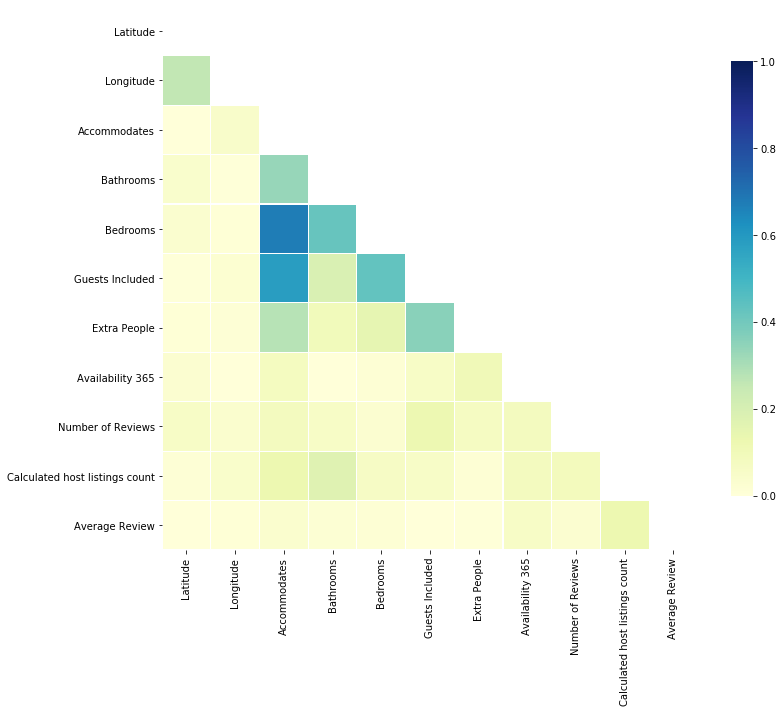

In [27]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

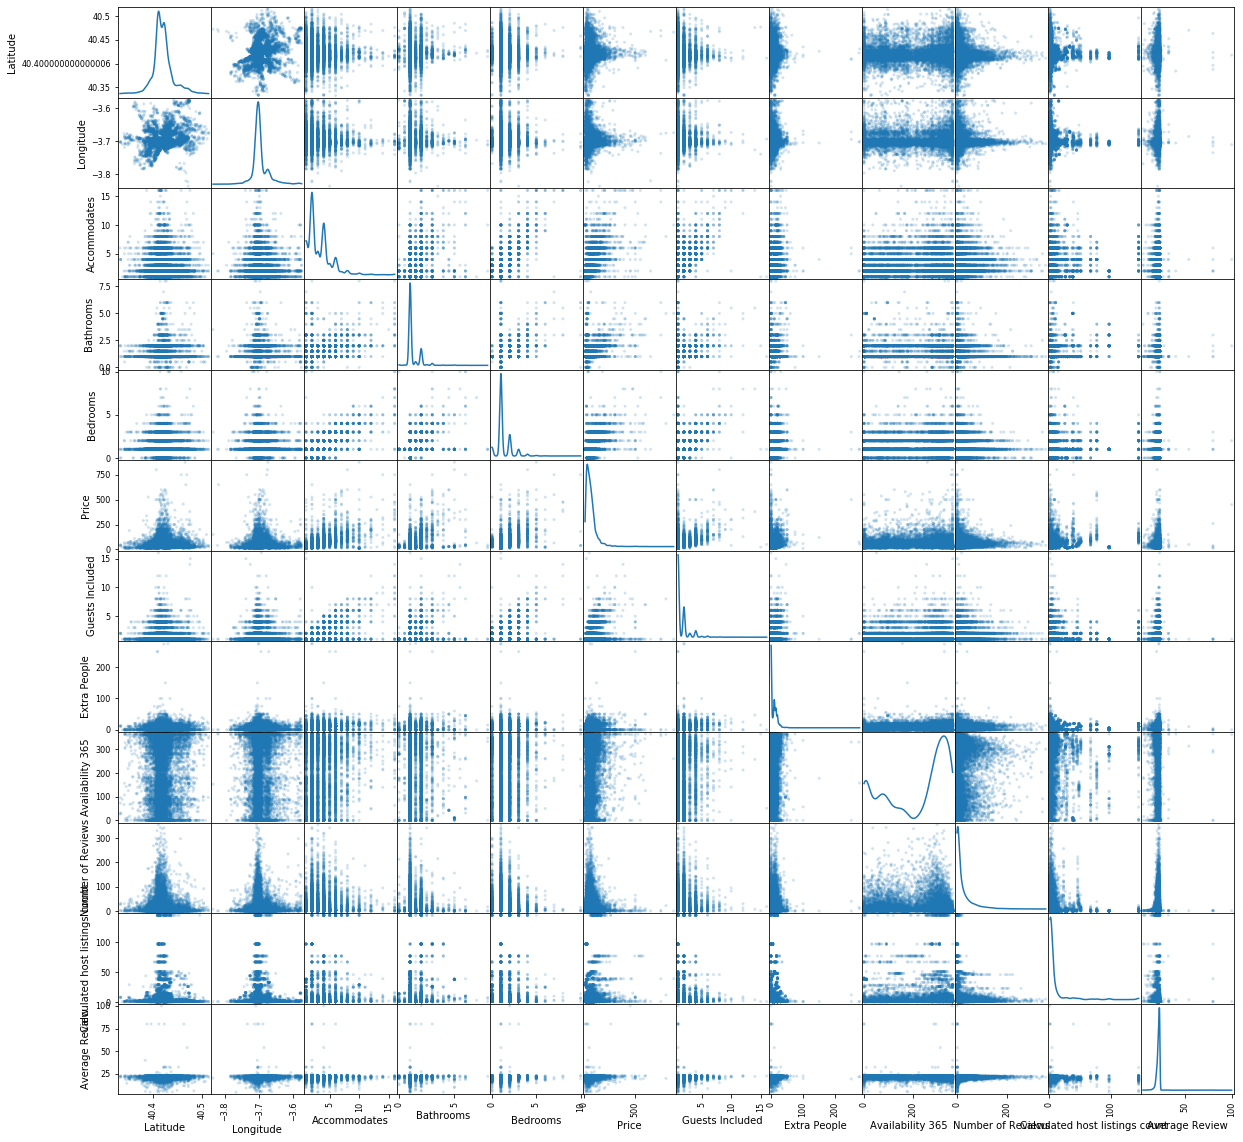

In [28]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Habría que quitar los outliers de la variable objetivo

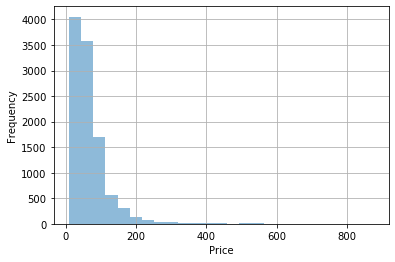

In [29]:
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

In [30]:
df['Price'].describe()

count    10559.00000
mean        66.18515
std         56.16416
min          9.00000
25%         31.00000
50%         53.00000
75%         80.00000
max        875.00000
Name: Price, dtype: float64

In [31]:
df = df[df['Price'] < 150]

In [32]:
df['Price'].describe()

count    9918.000000
mean       55.846239
std        30.254866
min         9.000000
25%        30.000000
50%        50.000000
75%        75.000000
max       149.000000
Name: Price, dtype: float64

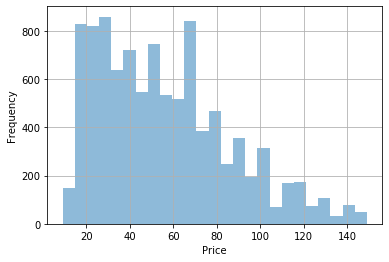

In [33]:
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

### Feature engineering

In [34]:
df.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Price', 'Guests Included', 'Extra People', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Average Review'],
      dtype='object')

In [35]:
df['bedrooms_squared'] = df['Bedrooms'].apply(lambda x: x**2)
df['bed_bath_rooms']   = df['Bedrooms']*df['Bathrooms']
df['lat_plus_long']    = df['Latitude']*df['Longitude']

### Limpieza

Se dejan de lado valores sin sentido como el que el precio o los baños tengan valores de cero.

In [36]:
df = df[df['Price'] != 0]
df = df[df['Bathrooms'] != 0]

### Categorización de variables

In [37]:
df.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Price', 'Guests Included', 'Extra People', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Average Review', 'bedrooms_squared',
       'bed_bath_rooms', 'lat_plus_long'],
      dtype='object')

In [38]:
df.shape

(9866, 20)

Es necesario transformar las variables categóricas a numéricas

In [39]:
df.dtypes

Neighbourhood Cleansed             object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Bed Type                           object
Price                             float64
Guests Included                     int64
Extra People                        int64
Availability 365                    int64
Number of Reviews                   int64
Cancellation Policy                object
Calculated host listings count    float64
Average Review                    float64
bedrooms_squared                  float64
bed_bath_rooms                    float64
lat_plus_long                     float64
dtype: object

In [40]:
list(df.select_dtypes(include=['object']).columns)

['Neighbourhood Cleansed',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [41]:
#Encoding, usando la media de la variable objetivo para cada categoría.

variables_categ = ['Neighbourhood Cleansed', 'Property Type','Room Type', 'Bed Type', 'Cancellation Policy']

mean_map = {}
for i in variables_categ:
    mean = df.groupby(i)['Price'].mean()
    df[i] = df[i].map(mean)    
    mean_map[i] = mean

In [42]:
# aun se tienen valores nulos para algunas variables

df.isnull().sum()

Neighbourhood Cleansed               0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           34
Bedrooms                            18
Bed Type                             0
Price                                0
Guests Included                      0
Extra People                         0
Availability 365                     0
Number of Reviews                    0
Cancellation Policy                  0
Calculated host listings count       0
Average Review                    2067
bedrooms_squared                    18
bed_bath_rooms                      52
lat_plus_long                        0
dtype: int64

In [43]:
import statistics

df["Bathrooms"].fillna(statistics.mode(df["Bathrooms"]), inplace=True)
df["Bedrooms"].fillna(statistics.mode(df["Bedrooms"]), inplace=True)
df["Average Review"].fillna(df["Average Review"].mean(), inplace=True)
df["bedrooms_squared"].fillna(df["bedrooms_squared"].mean(), inplace=True)
df["bed_bath_rooms"].fillna(df["bed_bath_rooms"].mean(), inplace=True)

In [44]:
df.dtypes

Neighbourhood Cleansed            float64
Latitude                          float64
Longitude                         float64
Property Type                     float64
Room Type                         float64
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Bed Type                          float64
Price                             float64
Guests Included                     int64
Extra People                        int64
Availability 365                    int64
Number of Reviews                   int64
Cancellation Policy               float64
Calculated host listings count    float64
Average Review                    float64
bedrooms_squared                  float64
bed_bath_rooms                    float64
lat_plus_long                     float64
dtype: object

## Modelos

Probaré con tres modelos, Una regresión con regularización Lasso, Gradient boosting y Random forest. Se empleará gridSearch para
elegir los mejores hiperparámetros.

In [45]:
df.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Price', 'Guests Included', 'Extra People', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Average Review', 'bedrooms_squared',
       'bed_bath_rooms', 'lat_plus_long'],
      dtype='object')

In [46]:
# poner a price en la primera columna

df = df[['Price', 'Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Guests Included', 'Extra People', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Average Review', 'bedrooms_squared',
       'bed_bath_rooms', 'lat_plus_long']]

In [47]:
from sklearn import preprocessing

data = df.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

feature_names = df.columns[1:]

# Escalamos (con los datos de train)

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [48]:
feature_names

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Guests Included', 'Extra People', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Average Review', 'bedrooms_squared',
       'bed_bath_rooms', 'lat_plus_long'],
      dtype='object')

best mean cross-validation score: -337.123
best parameters: {'alpha': 0.03162277660168379}


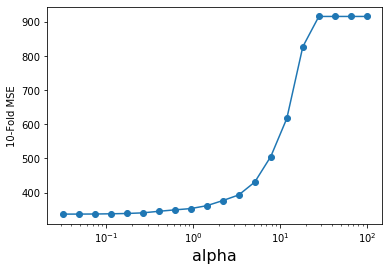

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5, 2,20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [50]:
# cargar dataset de test y hacerlo pasar por las mismas transformaciones que el train set

df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# quitamos las columnas de Url

columnas_url = ['Listing Url', 'Thumbnail Url', 'Medium Url',
   'Picture Url', 'XL Picture Url', 'Host URL',
   'Host Thumbnail Url', 'Host Picture Url']

df_test = df_test.drop(columnas_url, axis=1)

columnas_2 = ['ID', 'Scrape ID', 'Last Scraped',
             'Weekly Price','Monthly Price', 'Minimum Nights',
             'Maximum Nights', 'Calendar Updated', 'Calendar last Scraped',
             'Host ID', 'Host Name', 'Host Since',
             'Host Location', 'Host About', 'Host Response Time',
             'Host Response Rate', 'Host Acceptance Rate', 'Host Neighbourhood',
             'Host Listings Count', 'Host Total Listings Count',
             'Host Verifications', 'First Review', 'Last Review']

df_test = df_test.drop(columnas_2, axis=1)

Text_columns = ['Name', 'Summary', 'Space', 'Description',
                'Neighborhood Overview', 'Notes', 'Transit',
                'Access', 'Interaction', 'House Rules', 'Amenities']

df_test = df_test.drop(Text_columns, axis=1)

df_test = df_test[df_test.City == 'Madrid']

columnas_3 = ['City', 'Experiences Offered', 'Street', 'Neighbourhood',
              'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market', 'Smart Location',
              'Country Code', 'Country', 'Geolocation', 'Features', 'Has Availability', 'License', 'Jurisdiction Names']

df_test = df_test.drop(columnas_3, axis=1)

columnas_valores_faltantes = ['Square Feet', 'Security Deposit', 'Cleaning Fee']

df_test = df_test.drop(columnas_valores_faltantes, axis=1)

media_reviews = df_test.loc[: , "Review Scores Rating":"Review Scores Value"]

df_test['Average Review'] = media_reviews.mean(axis=1)

df_test = df_test.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
         'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Beds'], axis=1)

df_test = df_test[df_test['Price'] < 150]

df_test['bedrooms_squared'] = df_test['Bedrooms'].apply(lambda x: x**2)
df_test['bed_bath_rooms']   = df_test['Bedrooms']*df_test['Bathrooms']
df_test['lat_plus_long']    = df_test['Latitude']*df_test['Longitude']

df_test = df_test[df_test['Price'] != 0]
df_test = df_test[df_test['Bathrooms'] != 0]

#***************

#Encoding, usando la media de la variable objetivo para cada categoría.

variables_categ = ['Neighbourhood Cleansed', 'Property Type','Room Type', 'Bed Type', 'Cancellation Policy']

mean_map = {}
for i in variables_categ:
    mean = df_test.groupby(i)['Price'].mean()
    df_test[i] = df_test[i].map(mean)    
    mean_map[i] = mean

#****************
df_test["Bathrooms"].fillna(statistics.mode(df_test["Bathrooms"]), inplace=True)
df_test["Bedrooms"].fillna(statistics.mode(df_test["Bedrooms"]), inplace=True)
df_test["Average Review"].fillna(df_test["Average Review"].mean(), inplace=True)
df_test["bedrooms_squared"].fillna(df_test["bedrooms_squared"].mean(), inplace=True)
df_test["bed_bath_rooms"].fillna(df_test["bed_bath_rooms"].mean(), inplace=True)

df_test = df_test[['Price', 'Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Bed Type',
       'Guests Included', 'Extra People', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Average Review', 'bedrooms_squared',
       'bed_bath_rooms', 'lat_plus_long']]

In [51]:
data_test = df_test.values

y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [52]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)
print('RMSE Modelo Lasso (train): %0.5g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.5g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 335.21
MSE Modelo Lasso (test) : 327.81
RMSE Modelo Lasso (train): 18.309
RMSE Modelo Lasso (test) : 18.105
Neighbourhood Cleansed 7.118815109903931
Latitude 0.2766893414892954
Longitude 0.4392101698633443
Property Type -0.45210860057838886
Room Type 15.31942961352676
Accommodates 4.462401964565016
Bathrooms -1.4209675030326077
Bedrooms 8.804118687494407
Bed Type 0.4185888662496986
Guests Included 2.604561645021294
Extra People -0.7072251369053751
Availability 365 2.1645754046080152
Number of Reviews -2.7699571180781586
Cancellation Policy -0.8085739986302878
Calculated host listings count 1.717000781155282
Average Review 1.7743219660747989
bedrooms_squared -8.656891466390249
bed_bath_rooms 5.875336416958801
lat_plus_long 0.0


In [78]:
R2TrainModelLasso = lasso.score(XtrainScaled,y_train)
R2TestModelLasso = lasso.score(XtestScaled,y_test)

print('R^2 Modelo Lasso (train): %0.5g' % R2TrainModelLasso)
print('R^2 Modelo Lasso (test) : %0.5g' % R2TestModelLasso)

R^2 Modelo Lasso (train): 0.63392
R^2 Modelo Lasso (test) : 0.63969


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [100, 500, 1000, 2000]
learningRate = [0.1, 0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=10)
grid.fit(X_train, np.ravel(y_train,order='C'))
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . learning_rate=0.1, n_estimators=100, score=0.726, total=   1.5s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=100, score=0.703, total=   1.5s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=100, score=0.704, total=   1.5s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=100, score=0.729, total=   1.6s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=100, score=0.726, total=   1.5s
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=500, score=0.747, total=   7.5s
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.0s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=500, score=0.717, total=   7.5s
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.5s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=500, score=0.727, total=   7.3s
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.8s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=500, score=0.744, total=   7.3s
[CV] learning_rate=0.1, n_estimators=500 .............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   37.1s remaining:    0.0s


[CV] . learning_rate=0.1, n_estimators=500, score=0.747, total=   7.6s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV]  learning_rate=0.1, n_estimators=1000, score=0.748, total=  15.1s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV]  learning_rate=0.1, n_estimators=1000, score=0.710, total=  14.9s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV]  learning_rate=0.1, n_estimators=1000, score=0.726, total=  15.2s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV]  learning_rate=0.1, n_estimators=1000, score=0.741, total=  14.7s
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV]  learning_rate=0.1, n_estimators=1000, score=0.746, total=  14.8s
[CV] learning_rate=0.1, n_estimators=2000 ............................
[CV]  learning_rate=0.1, n_estimators=2000, score=0.738, total=  29.4s
[CV] learning_rate=0.1, n_estimators=2000 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.9min finished


best mean cross-validation score: 0.737
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


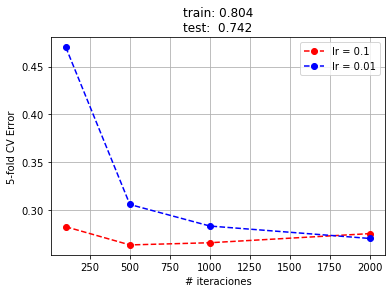

In [59]:
learning_rate = grid.best_params_['learning_rate']
NEstimators = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=learning_rate, n_estimators=NEstimators)
bt.fit(X_train,np.ravel(y_train,order='C'))

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train, np.ravel(y_train,order='C'))

y_predict = rf.predict(X_test)
rf_testing_set_score = rf.score(X_test, y_test)
rf_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)
print('R^2 en datos de test: ' + str(round(rf_testing_set_score,3)))
print('Mediana del error en datos de test: ' + str(round(rf_median_abs_error,3)))
print('Media del error en datos de test: ' + str(round(rf_mean_abs_error,3)))

R^2 en datos de test: 0.722
Mediana del error en datos de test: 8.21
Media del error en datos de test: 11.522


In [62]:
tuned_parameters = {
    "n_estimators": [100, 500, 1000, 2000]
}

rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 5, param_grid = tuned_parameters)

preds = rf_tuned.fit(X_train, np.ravel(y_train,order='C'))
best = rf_tuned.best_estimator_ 
y_predict = rf_tuned.predict(X_test)

rft_train_set_score = rf_tuned.score(X_train, y_train)
rft_testing_set_score = rf_tuned.score(X_test, y_test)
rft_mean_abs_error = mean_absolute_error(y_test, y_predict)

print('Mejores parámetros:', rf_tuned.best_params_)

print('R^2 en datos de train: ' + str(round(rft_train_set_score,3)))
print('R^2 en datos de test: ' + str(round(rft_testing_set_score,3)))
print('Media del error en datos de test: ' + str(round(rft_mean_abs_error,3)))

Mejores parámetros: {'n_estimators': 2000}
R^2 en datos de train: 0.963
R^2 en datos de test: 0.724
Media del error en datos de test: 11.485


best mean cross-validation score: 0.723
best parameters: {'max_depth': 14}


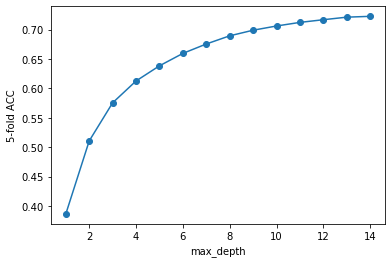

In [64]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, np.ravel(y_train,order='C'))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [76]:
maxDepthOptimo = grid.best_params_['max_depth'] 
RandomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,np.ravel(y_train,order='C'))

print("Train: ",RandomForest.score(X_train,y_train))
print("Test: ",RandomForest.score(X_test,y_test))

Train:  0.8836769523272179
Test:  0.727736362667146


In [77]:
maxDepthOptimo = 11 
RandomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,np.ravel(y_train,order='C'))

print("Train: ",RandomForest.score(X_train,y_train))
print("Test: ",RandomForest.score(X_test,y_test))

Train:  0.8130269656027527
Test:  0.7167535541445249


### Conclusión

De los tres modelos que se probaron, me quedaría con el de Gradient Boosting, que muestra mejores resultados en el conjunto 
de test.

Sería interesante el intentar extender el modelo trabajando con tecnicas de NLP las columnas de texto que se dejaron de lado
al principio del análisis.